<a href="https://colab.research.google.com/" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

> **How to use this in Colab:**  
> 1) Click the badge → **File → Upload notebook** → select this `.ipynb`.  
> 2) Or push to GitHub and replace the badge URL with your repo’s Colab link.  
> 3) Run cells top-to-bottom. Cells labeled **Your Turn** ask you to tweak and re-run.

## BME i9400
## Fall 2025
### Essentials of Optimization
### Guided Worksheet — Colab Edition

### Learning Goals
- Define **regression vs classification**, **loss functions** (MSE & BCE), **gradients**, and the **gradient descent update rule**.  
- See convex vs. non-convex landscapes.  
- Compare **batch GD** and **SGD**.

## 0) Colab setup (safe to re-run)

In [ ]:
try:
    import google.colab  # type: ignore
    IN_COLAB = True
except Exception:
    IN_COLAB = False

import math, random, numpy as np, matplotlib.pyplot as plt

def nice():
    plt.rcParams['figure.figsize'] = (6, 4)
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.grid'] = False
    plt.rcParams['figure.dpi'] = 120

def reset_seeds(seed=7):
    np.random.seed(seed)
    random.seed(seed)

reset_seeds(7)
nice()
print(f"✅ Setup complete. IN_COLAB={IN_COLAB}")

✅ Setup complete. IN_COLAB=True


## 1) Loss Functions: measuring 'how wrong' we are

**Regression vs Classification**  
- **Regression** predicts a continuous value (e.g., house price).  
- **Classification** predicts a discrete label (e.g., cat vs dog).  

**What is a Loss Function?**  
A **loss** measures discrepancy between predictions $\hat{y}$ (or $\hat{p}$) and true labels $y$. We train by **minimizing** loss.

- **Mean Squared Error (MSE)** (regression):  
$L_{\text{MSE}} = \tfrac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

- **Binary Cross-Entropy (BCE)** (binary classification):  
$L_{\text{BCE}} = - \tfrac{1}{n} \sum_{i=1}^n \big[ y_i \log(\hat{p}_i) + (1-y_i)\log(1-\hat{p}_i) \big]$

In [ ]:
# MSE on a toy regression example
import numpy as np
y_true = np.array([2.0, 0.0, -1.0, 3.0])
y_pred = np.array([1.0, -0.5, -0.5, 2.5])

mse = np.mean((y_pred - y_true)**2)
print(f"MSE = {mse:.3f}")

MSE = 0.438


In [ ]:
# Binary cross-entropy on a toy classification example
y_true = np.array([1, 0, 1, 1, 0])            # labels in {0,1}
p_pred = np.array([0.9, 0.2, 0.7, 0.55, 0.1]) # predicted probabilities for class 1

eps = 1e-12
bce = -np.mean(y_true*np.log(p_pred+eps) + (1-y_true)*np.log(1-p_pred+eps))
print(f"Binary cross-entropy = {bce:.3f}")

Binary cross-entropy = 0.278


### Your Turn ▶️
1) In the cross-entropy example, set one of the elements of ```p_pred``` to $0$ when $y=1$. What happens and why?

## 2) Gradients: direction of steepest descent

**What is a Gradient?**  
The gradient of $f$ is the vector of partial derivatives:  
$\nabla f(x) = [ \tfrac{\partial f}{\partial x_1}, \dots, \tfrac{\partial f}{\partial x_d} ]$.  
It points toward **steepest increase**; moving **opposite** the gradient decreases the function fastest (locally).

In [ ]:
def f(x):
    return x**2

def fprime_analytical(x):
    return 2*x

def fprime_numeric(x, h=1e-5):
    return (f(x+h) - f(x-h)) / (2*h)

xs = np.linspace(-3, 3, 13)
hs = [1e-1, 1e-3, 1e-5, 1e-7]

for h in hs:
    err = np.mean(np.abs(fprime_numeric(xs, h=h) - fprime_analytical(xs)))
    print(f"h={h:<.0e}  mean |error| ≈ {err:.3e}")

h=1e-01  mean |error| ≈ 2.289e-15
h=1e-03  mean |error| ≈ 3.323e-13
h=1e-05  mean |error| ≈ 1.872e-11
h=1e-07  mean |error| ≈ 3.752e-09


### Your Turn ▶️  
Try a *very large* $h$ (e.g., $10^{-0}$) and a *very small* $h$ (e.g., $10^{-10}$).  
What happens to the error? (Hint: truncation vs. floating-point limits.)

## 3) Gradient Descent in 1D

**Gradient Descent Update Rule**  
$\theta^{(t+1)} = \theta^{(t)} - \eta \, \nabla_\theta L(\theta^{(t)})$

- $\eta$ is the **learning rate** (step size).  
- We subtract the gradient because it points uphill; subtracting moves us **downhill** to reduce the loss.

In [ ]:
def f1(x):
    return (x-3.0)**2

def f1prime(x):
    return 2*(x-3.0)

def grad_descent_1d(x0=0.0, lr=0.1, steps=20):
    xs = [x0]
    x = x0
    for _ in range(steps):
        x = x - lr * f1prime(x)
        xs.append(x)
    return np.array(xs)

# Try a couple of learning rates
for lr in [0.01, 0.1, 0.5, 1.1]:
    xs = grad_descent_1d(x0=-4.0, lr=lr, steps=20)
    print(f"lr={lr:<4}  final x ≈ {xs[-1]:.4f}, f(x)≈{f1(xs[-1]):.4e}")

lr=0.01  final x ≈ -1.6733, f(x)≈2.1839e+01
lr=0.1   final x ≈ 2.9193, f(x)≈6.5132e-03
lr=0.5   final x ≈ 3.0000, f(x)≈0.0000e+00
lr=1.1   final x ≈ -265.3632, f(x)≈7.2019e+04


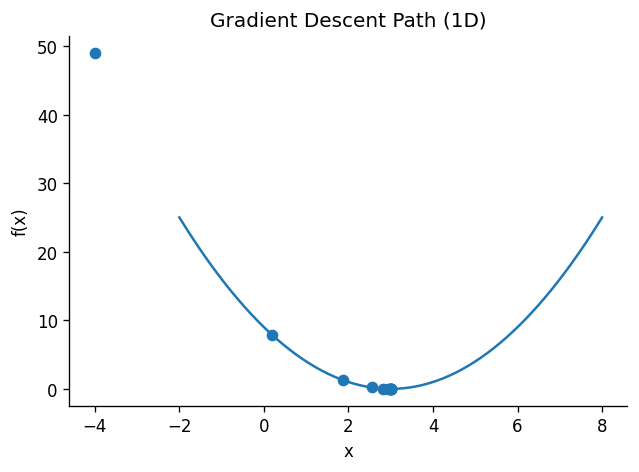

In [ ]:
# Visualize a single run
xgrid = np.linspace(-2, 8, 200)
plt.plot(xgrid, f1(xgrid), label="f(x) = (x-3)^2")
xs = grad_descent_1d(x0=-4.0, lr=0.3, steps=12)
plt.scatter(xs, f1(xs), zorder=3)
plt.title("Gradient Descent Path (1D)")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.show()

### Your Turn ▶️
- In the first cell, try `lr=1.5` and `lr=0.001`. What happens (overshoot/diverge vs. slow crawl)?  

## 4) 2D Quadratic Bowl

**Convex Functions**  
A function $f$ is **convex** if for all $x,y$ and $\lambda \in [0,1]$:  
$f(\lambda x + (1-\lambda)y) \leq \lambda f(x) + (1-\lambda) f(y)$.  
Convex functions have a **single global minimum**, so GD behaves predictably.

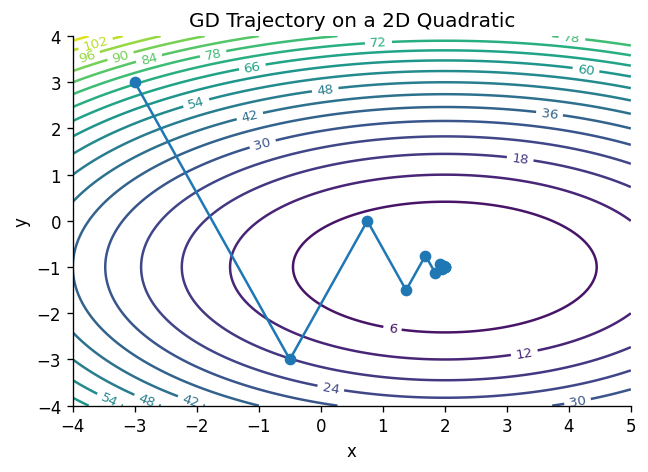

In [ ]:
def f2(xy):
    x, y = xy
    return (x-2.0)**2 + 3.0*(y+1.0)**2

def f2grad(xy):
    x, y = xy
    return np.array([2*(x-2.0), 6*(y+1.0)])

def gd_2d(xy0=np.array([-3.0, 3.0]), lr=0.2, steps=20):
    xy = xy0.astype(float)
    path = [xy.copy()]
    for _ in range(steps):
        xy -= lr * f2grad(xy)
        path.append(xy.copy())
    return np.array(path)

# Plot contours and path
x = np.linspace(-4, 5, 200)
y = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, y)
Z = (X-2.0)**2 + 3.0*(Y+1.0)**2

CS = plt.contour(X, Y, Z, levels=20)
plt.clabel(CS, inline=1, fontsize=8)
path = gd_2d(xy0=np.array([-3.0, 3.0]), lr=0.25, steps=12)
plt.plot(path[:,0], path[:,1], marker="o")
plt.title("GD Trajectory on a 2D Quadratic")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

### Your Turn ▶️
- Change the starting point to something else (e.g., `[4, -4]`).  
- Increase the learning rate until you see instability. What happens to the path?

## 5) Non-Convex in 1D: local minima happen

Real ML losses (e.g., deep nets) are **non-convex**: many local minima and saddle points.  
Behavior depends on initialization and learning rate.

In [ ]:
def g(x):
    return x**4 - 3*x**3 + 2

def gprime(x):
    return 4*x**3 - 9*x**2

def gd_1d(func_prime, x0=-1.0, lr=0.01, steps=60):
    xs = [x0]
    x = x0
    for _ in range(steps):
        x = x - lr*func_prime(x)
        xs.append(x)
    return np.array(xs)

xgrid = np.linspace(-1.5, 3.0, 300)
plt.plot(xgrid, g(xgrid))
for x0 in [-1.0, 0.5, 2.5]:
    xs = gd_1d(gprime, x0=x0, lr=0.01, steps=80)
    plt.scatter(xs, g(xs), s=10, label=f"x0={x0}")
plt.legend()
plt.title("Non-Convex f(x) with Multiple Attractors")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.show()

### Your Turn ▶️
- Try `x0=2.0` with `lr=0.1` vs `lr=0.005`. Do you land in the same place?  
- What does this suggest about training deep (non-convex) models?

## 6) Batch GD vs SGD (tiny regression)

**Batch vs. Stochastic Gradient Descent**  
- **Batch GD**: gradient on the **entire dataset** each step. Stable but slow.  
- **SGD**: gradient on **one sample** (or small mini-batch). Noisy but fast & scalable.

| Method | Pros | Cons |
|--------|------|------|
| Batch GD | Stable, exact gradient | Slow on large data |
| SGD | Fast, scales well | Noisy updates |

In [ ]:
# Generate tiny dataset
reset_seeds(0)
n = 60
X = np.linspace(-2, 2, n).reshape(-1,1)
true_w, true_b = 1.7, -0.4
y = true_w*X[:,0] + true_b + 0.4*np.random.randn(n)

def predict(w, b, X):
    return w*X[:,0] + b

def mse_loss(w, b, X, y):
    return np.mean((predict(w,b,X) - y)**2)

def grad_batch(w, b, X, y):
    yhat = predict(w,b,X)
    dw = 2*np.mean((yhat - y)*X[:,0])
    db = 2*np.mean(yhat - y)
    return dw, db

def grad_single(w, b, x_i, y_i):
    yhat = w*x_i + b
    dw = 2*(yhat - y_i)*x_i
    db = 2*(yhat - y_i)
    return dw, db

# Train with batch GD
w, b = 0.0, 0.0
lr = 0.05
batch_losses = []
for _ in range(80):
    dw, db = grad_batch(w, b, X, y)
    w -= lr*dw; b -= lr*db
    batch_losses.append(mse_loss(w,b,X,y))

# Train with SGD (one sample per step)
w_s, b_s = 0.0, 0.0
lr_s = 0.05
sgd_losses = []
for _ in range(80):
    i = np.random.randint(0, n)
    dw, db = grad_single(w_s, b_s, X[i,0], y[i])
    w_s -= lr_s*dw; b_s -= lr_s*db
    sgd_losses.append(mse_loss(w_s,b_s,X,y))

plt.plot(batch_losses, label="Batch GD")
plt.plot(sgd_losses, label="SGD (1 sample/step)")
plt.xlabel("Step"); plt.ylabel("MSE on full data")
plt.title("Batch vs SGD (noisy convergence vs smooth)")
plt.legend()
plt.show()

print(f"Batch GD final  w≈{w:.3f}, b≈{b:.3f}")
print(f"SGD final       w≈{w_s:.3f}, b≈{b_s:.3f}")

### Your Turn ▶️
- Increase the noise level (change `0.4`). What happens to the SGD curve?  
- Try mini-batches: choose `k=8` random points per step and average their gradients.  
- Which would you prefer for **very large datasets**, and why?

## 7) Wrap-up
- Loss functions quantify error; gradients show how to reduce it.  
- The update rule $\theta \leftarrow \theta - \eta \, \nabla L$ is the core of training.  
- Convex problems are easier; deep nets are non-convex (initialization & LR matter).  
- **SGD** trades stability for speed and scalability.